<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_05_01_survival_analysis_cause_specific_hazard_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 5.1 Cause-Specific Hazard Regression


**Cause-Specific Hazard Regression** is a statistical method used in survival analysis when there are **multiple possible types (or causes) of failure or events**, and the goal is to model the risk (hazard) of experiencing a **specific type of event** over time, while accounting for the presence of other competing events.



## Overview


This models the cause-specific hazard (the rate of a specific event among those still at risk and event-free) for each competing event separately, typically using Cox proportional hazards models. The CIF is then derived by integrating the cause-specific hazards with the overall survival function. Coefficients represent hazard ratios for the effect of covariates on the event rate. It is ideal for etiologic questions (understanding causal mechanisms) but does not directly model absolute risks, which can lead to indirect interpretations in prediction. For example, in heart failure data, this approach might show no significant effect of cancer on cardiac death hazard.


### Key Concepts


1. **Competing Risks Setting**:

   - In many real-world scenarios, individuals are at risk of more than one mutually exclusive event.
   - Example: In a study of cancer patients, the outcome of interest might be death due to cancer, but patients could also die from heart disease, accidents, or other causes. These are *competing risks* because the occurrence of one event (e.g., death from heart disease) prevents the observation of the other (e.g., death from cancer).


### Cause-specific Cox regression


Given covariates $(X, Z)$, let $S_0(t|x, z) = P(T > t|X = x, Z = z)$ denote the event-free survival function  and $F_j(t|x, z) = P(T \leq t, D = j|X = x, Z = z)$ the cumulative incidence function for event $j$. The  cause-specific hazard rates are defined as $\lambda_{j,z}(t|x) = \frac{dF_j(t|x, z)}{S_0(t|x, z)}$ (Andersen et al., 1993). We  also denote the cumulative hazard rates by $\Lambda_{j,z}(t|x) = \int_0^t \lambda_{j,z}(s|x)\,ds$. The stratified Cox regression  model (Cox, 1972) for cause $j$ is given by

$$
\lambda_{j,z}(t|x) = \lambda_{0j,z}(t) \exp(x\beta_j), \quad (1)
$$

where

$\beta_j = (\beta_{1j}, \dots, \beta_{pj})^\top$  is a $p$-dimensional vector of regression coefficients (the log-hazard ratios),  and $\{\lambda_{0j,z}(t) : z = 1, \dots, L\}$ a set of unspecified baseline hazard functions.


### Predicting the absolute risk of an event


The cause-specific Cox regression models can be combined into a prediction of the absolute risk of an  event of type 1 until time $t$ conditional on the covariates $x, z$. For the case where $K = 2$ the absolute  risk formula of Benichou and Gail (1990) is given by:

$$
F_1(t|x, z) = \int_0^t S(s- |x, z)\lambda_{1,z}(s|x)\,ds. \quad (2)
$$

where $s-$ denotes the right sided limit, e.g. $\Lambda_{1,z}(s^- |x) = \lim_{v\to s, v<s} \Lambda_{1,z}(v|x)$. The absolute risk  accumulates over time the product between the event-free survival and the hazard of experiencing the  event of interest, both conditional to the baseline covariates and to the strata variable. The event free  survival can be estimated from the cause-specific hazards using the product integral estimator:

$$
S(t|x, z) = \prod_{s\leq t} \left(1 - d\Lambda_{1,z}(t|x) - d\Lambda_{2,z}(t|x)\right)
$$

or the exponential approximation:

$$
\hat{S}(t|x, z) = \exp \left[ -\hat{\Lambda}_{1,z}(t|x) - \hat{\Lambda}_{2,z}(t|x) \right]. \quad
$$

which is asymptotically equivalent to the product-limit estimator if the distribution of the event times  is continuous. Using the product integral estimator ensures that $S(t|x, z) + F_1(t|x, z) + F_2(t|x, z)$ equals exactly 1. This is a desirable property since the sum of the transition probabilities over all possible  transitions should sum to one.



### Advantages


- Directly models the biological or clinical mechanism of a specific event type.
- Coefficients have a clear interpretation in terms of instantaneous risk.
- Works well with standard survival software (e.g., `coxph` in R, with appropriate censoring coding).


### Limitations


- **Does not directly estimate the cumulative incidence** (i.e., the actual probability of experiencing the event by time \(t\)), because it ignores the impact of competing risks on the overall event probability.
- For predicting *absolute risk*, **Fine-Gray subdistribution hazard models** are often preferred.
- Results can be sensitive to assumptions about censoring (e.g., assuming competing events are non-informative).


### Example


Suppose you study patients after a bone marrow transplant:
- Event of interest: relapse of leukemia.
- Competing event: death without relapse.

A cause-specific hazard model for relapse would:
- Treat death without relapse as censoring at the time of death.
- Estimate how factors (e.g., age, donor match) affect the **instantaneous risk of relapse**, among patients who have neither relapsed nor died up to that time.


## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316568 sha256=da2d27418cba4ba7271d61602dc8a9282cc97fa46e71892db80e29c5a5832d45
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cause-Specific Hazard Regression for Competing Risks in R


In competing risks analysis, **cause-specific hazard (CSH)** regression models the instantaneous risk of a specific event type, treating other event types as censoring. This tutorial demonstrates how to fit, interpret, and visualize CSH models using the `Melanoma` dataset from the `riskRegression`` package.


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression',
		 'prodlim',
		 'lava',
		 'mstate',
		 'regplot',
		 'cmprskcoxmsm'
		 )


### Install missing packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')


### Verify installation

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condSURV riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 
       prodlim           lava         mstate        regplot   cmprskcoxmsm 
          TRUE           TRUE           TRUE           TRUE           TRUE 


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:cmprskcoxmsm"   "package:regplot"        "package:mstate"        
 [4] "package:lava"           "package:prodlim"        "package:riskRegression"
 [7] "package:condSURV"       "package:cmprsk"         "package:timereg"       
[10] "package:ggfortify"      "package:tidycmprsk"     "package:ggsurvfit"     
[13] "package:survminer"      "package:ggpubr"         "package:survival"      
[16] "package:lubridate"      "package:forcats"        "package:stringr"       
[19] "package:dplyr"          "package:purrr"          "package:readr"         
[22] "package:tidyr"          "package:tibble"         "package:ggplot2"       
[25] "package:tidyverse"      "package:tools"          "package:stats"         
[28] "package:graphics"       "package:grDevices"      "package:utils"         
[31] "package:datasets"       "package:methods"        "package:base"          


### Data Preparation


In the period 1962-77, 205 patients with malignant melanoma (cancer of the skin) had a radical operation performed at Odense University Hospital, Denmark. All patients were followed until the end of 1977 by which time 134 were still alive while 71 had died (of out whom 57 had died from cancer and 14 from other causes).

`time`: time in days from operation

`status`: a numeric with values 0=censored 1=death.malignant.melanoma 2=death.other.causes

`event`: a factor with levels censored death.malignant.melanoma death.other.causes

`invasion`: a factor with levels level.0, level.1, level.2

`ici`: inflammatory cell infiltration (IFI): 0, 1, 2 or 3

`epicel`: a factor with levels not present present

`ulcer`: a factor with levels not present present

`thick`: tumour thickness (in 1/100 mm)

`sex`: a factor with levels Female Male

`age`: age at operation (years)

`logthick`: tumour thickness on log-scale




In [ ]:
%%R
data(Melanoma, package = "riskRegression")
str(Melanoma)

'data.frame':	205 obs. of  11 variables:
 $ time    : int  10 30 35 99 185 204 210 232 232 279 ...
 $ status  : num  2 2 0 2 1 1 1 1 2 1 ...
 $ event   : Factor w/ 3 levels "censored","death.malignant.melanoma",..: 3 3 1 3 2 2 2 2 3 2 ...
 $ invasion: Factor w/ 3 levels "level.0","level.1",..: 2 1 2 1 3 3 3 3 2 1 ...
 $ ici     : Factor w/ 4 levels "0","1","2","3": 3 1 3 3 3 3 3 3 4 3 ...
 $ epicel  : Factor w/ 2 levels "not present",..: 2 1 1 1 2 1 2 1 1 1 ...
 $ ulcer   : Factor w/ 2 levels "not present",..: 2 1 1 1 2 2 2 2 2 2 ...
 $ thick   : num  6.76 0.65 1.34 2.9 12.08 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 2 1 2 2 2 2 1 1 ...
 $ age     : int  76 56 41 71 52 28 77 49 60 68 ...
 $ logthick: num  1.911 -0.431 0.293 1.065 2.492 ...


### Data Visualization

In [ ]:
# 2. Convert categorical variables to factors
Melanoma <- Melanoma %>%
  mutate(
    event  = factor(event,  labels = c("censored", "melanoma death", "other death")),
    status = factor(status, labels = c("censored", "dead - melanoma", "dead - other")),
    sex    = factor(sex,    labels = c("Female", "Male")),
    invasion = factor(invasion),
    epicel   = factor(epicel),
    ulcer    = factor(ulcer)
  )

cat("Categorical variables converted to factors\n\n")
cat("Category levels:\n")
sapply(Melanoma[c("event","status","sex","invasion","epicel","ulcer")], levels)

# 3. Summary statistics for numeric variables
cat("\nSummary statistics for numerical variables:\n\n")
Melanoma %>%
  select(time, age, thick, logthick) %>%
  summary() %>%
  print()

# 4. Better event labels (we'll mostly use the factor 'event' though)
event_labels <- c("0" = "Censored", "1" = "Melanoma Death", "2" = "Other Death")

# ────────────────────────────────────────────────────────────────
#                         VISUALIZATIONS
# ────────────────────────────────────────────────────────────────

# Theme & palette setup
theme_set(theme_minimal(base_size = 13) +
            theme(plot.title = element_text(face = "bold", hjust = 0.5)))

# Color palette similar to husl
my_colors <- c("#4c78a8", "#f58518", "#e45756", "#72b7a1", "#54a24b", "#b279a2")

# 1×6 layout (you can also use patchwork for more flexibility)
par(mfrow = c(2,3), mar = c(4.5,4.5,3.5,1.5), oma = c(0,0,2,0))
# or use ggplot + patchwork for cleaner modern look (recommended)

# ── Panel 1: Event distribution ─────────────────────────────────
p1 <- ggplot(Melanoma, aes(x = event)) +
  geom_bar(fill = my_colors[1:3], color = "white") +
  geom_text(stat = "count", aes(label = after_stat(count)),
            vjust = -0.5, fontface = "bold") +
  labs(title = "Event Distribution", y = "Count", x = NULL) +
  scale_x_discrete(labels = c("Censored", "Mel. Death", "Other Death")) +
  theme(axis.text.x = element_text(angle = 35, hjust = 1))

# ── Panel 2: Survival time distribution (in years) ──────────────
p2 <- ggplot(Melanoma, aes(x = time/365.25)) +
  geom_histogram(bins = 20, fill = "#4c78a8", color = "white", alpha = 0.8) +
  geom_vline(xintercept = median(Melanoma$time)/365.25,
             color = "firebrick", linetype = "dashed", linewidth = 1) +
  annotate("text", x = median(Melanoma$time)/365.25 * 1.1, y = Inf,
           label = sprintf("Median: %.1f years", median(Melanoma$time)/365.25),
           vjust = 1.5, hjust = 0, color = "firebrick") +
  labs(title = "Survival Time Distribution", x = "Time (years)", y = "Frequency")

# ── Panel 3: Age distribution ───────────────────────────────────
p3 <- ggplot(Melanoma, aes(x = age)) +
  geom_histogram(bins = 15, fill = "#e45756", color = "white", alpha = 0.8) +
  geom_vline(xintercept = mean(Melanoma$age),
             color = "firebrick", linetype = "dashed", linewidth = 1) +
  annotate("text", x = mean(Melanoma$age) * 1.05, y = Inf,
           label = sprintf("Mean: %.1f years", mean(Melanoma$age)),
           vjust = 1.5, hjust = 0, color = "firebrick") +
  labs(title = "Age Distribution", x = "Age (years)", y = "Frequency")

# ── Panel 4: Event by Sex ───────────────────────────────────────
p4 <- ggplot(Melanoma, aes(x = sex, fill = event)) +
  geom_bar(position = "dodge", color = "white") +
  scale_fill_manual(values = my_colors[1:3]) +
  labs(title = "Event Distribution by Sex", y = "Count", x = "Sex", fill = "Event") +
  theme(legend.position = "bottom")

# ── Panel 5: Age vs log tumor thickness ─────────────────────────
p5 <- ggplot(Melanoma, aes(x = logthick, y = age, color = status)) +
  geom_point(alpha = 0.7, size = 2.2) +
  scale_color_manual(values = c("#4c78a8", "#f58518", "#e45756")) +
  labs(title = "Age vs Log Tumor Thickness",
       x = "Log Tumor Thickness", y = "Age (years)", color = "Status") +
  theme(legend.position = "bottom")

# ── Panel 6: Kaplan-Meier overall survival ──────────────────────
surv_obj <- Surv(time = Melanoma$time, event = Melanoma$status != "censored")

km_fit <- survfit(surv_obj ~ 1, data = Melanoma)

p6 <- ggsurvplot(km_fit,
                 data = Melanoma,
                 risk.table = TRUE,
                 conf.int = TRUE,
                 palette = "#4c78a8",
                 title = "Overall Survival Curve",
                 xlab = "Time (days)",
                 ylab = "Survival Probability",
                 font.main = c(14, "bold", "black"),
                 risk.table.height = 0.25,
                 surv.median.line = "hv")

# ── Combine plots (modern way with patchwork) ───────────────────
library(patchwork)

(p1 + p2 + p3) /
  (p4 + p5 + p6$plot + p6$table + plot_layout(widths = c(1,1,2))) +
  plot_annotation(title = "Melanoma Dataset Exploration",
                  theme = theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5)))

# Alternative: just show survival plot if you prefer simple version
# ggsurvplot(km_fit, conf.int = TRUE, risk.table = TRUE)

### Estimation of the cause-specific hazards


`CSC()` provides Cause-specific Cox proportional hazard regression with `riskRegression` utilities. `CSC()` the argument formula is used to define the outcome variables with the help of the function `prodlim::Hist()`.

Here is an example of fitting a cause-specific hazard model using `riskRegression::CSC()`


In [ ]:
%%R
data(Melanoma, package = "riskRegression")
cfit0 <- CSC(formula = Hist(time,status) ~ age + logthick + epicel + strata(sex), data = Melanoma)
coef(cfit0)

$`Cause 1`
          age      logthick epicelpresent 
   0.01548722    0.68178505   -0.73848649 

$`Cause 2`
          age      logthick epicelpresent 
   0.07680909    0.04750975    0.31497177 




*Note**: `Hist()` is from `prodlim` (loaded with `riskRegression`) and handles competing risks event history.


In [ ]:
%%R
h <- with(Melanoma, prodlim::Hist(time,status))
h


Right-censored response of a competing.risks model

No.Observations: 205 

Pattern:
         
Cause     event right.censored
  1          57              0
  2          14              0
  unknown     0            134




If only one formula is provided, the CSC() function will use the same baseline covariates and strata variables for all cause-specific Cox regression models. Instead one may feed a list of formulas into the argument formula, one for each cause:



In [ ]:
%%R
cfit1 <- CSC(formula = list(Hist(time,status) ~ age + logthick + epicel + strata(sex), Hist(time,status) ~ age + strata(sex)), data = Melanoma)
coef(cfit1)

$`Cause 1`
          age      logthick epicelpresent 
   0.01548722    0.68178505   -0.73848649 

$`Cause 2`
       age 
0.07919648 




Note that the selection of baseline covariates for each cause in this example is not guided by clinical or statistical rationale; it serves solely to demonstrate the software's capabilities. The causes are automatically ordered based on the levels of the `status` variable if it is a factor; otherwise, they are sorted using `sort(as.character(unique(status)))`. This ordering is stored in `cfit1[["causes"]]`. Consequently, the first formula fits a Cox model for the first cause, the second formula for the second cause, and so forth.

Internally, `CSC()` generates a dummy variable for each cause and invokes the function specified by the `fitter` argument on an appropriately formatted `Surv()` object. By default, cause-specific Cox models are fitted using `survival::coxph()`. Users can alternatively specify a different fitting function via the `fitter` argument, such as `cph`.



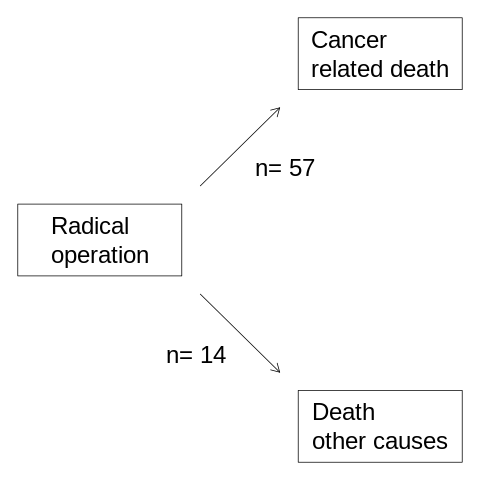

In [ ]:
%%R
plot(h, arrowLabelStyle = "count",
stateLabels = c("Radical\noperation", "Cancer\nrelated death", "Death\nother causes"))

### Visualizing Cause-Specific Hazards (absolute risk)


Absolute risk (CIF) plots can be created using `prodlim` package. Absolute risk is the probability of experiencing a specific event by a certain time, accounting for competing risks.


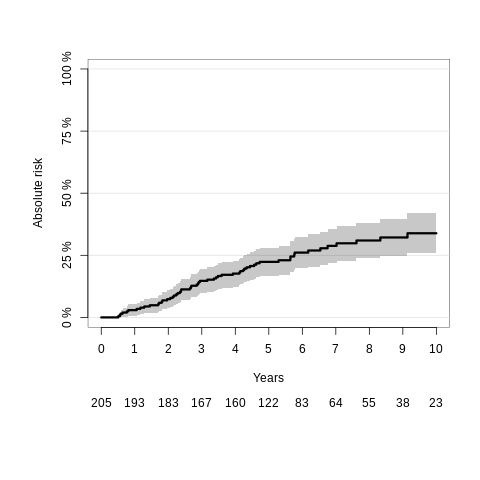

In [ ]:
%%R

library(prodlim)
plot(prodlim(Hist(time,status) ~1, data = Melanoma),
atrisk.at = seq(0,3652.5,365.25), xlim = c(0,3652.5),
axis1.at = seq(0,3652.5,365.25), axis1.lab = 0:10,
xlab = "Years", ylab = "Absolute risk", cause = 1)

### Predicting Absolute Risk from Cause-Specific Hazard Models



The object returned by `CSC()` is of class `"CauseSpecificCox"`. The next step involves invoking the associated `predict()` method. This requires three additional arguments beyond the `CSC` object: `newdata`, `times`, and `cause`.

- `newdata` must be a `data.frame` containing the covariates $X$ and $Z$ in the same structure as the data used to fit the `CSC()` model.  
- `cause` specifies the event type of interest ($D$).  
- `times` is a vector of prediction time point(s), each serving as the upper limit $t$ in formula (2).  

The `predict()` method then calculates the absolute risk (per formula (2)) for each row in `newdata` and each specified value in `times`.


In [ ]:
%%R
newdata <- data.frame(age = c(45,67), logthick = c(0.1,0.2), epicel = c("present","not present"), sex = c("Female","Male"))
pfit1 <- predict(cfit1, newdata = newdata, cause = 1, times = c(867,3500))
print(pfit1)

   observation   age logthick      epicel    sex times     strata absRisk
         <int> <num>    <num>      <char> <char> <num>     <fctr>   <num>
1:           1    45      0.1     present Female   867 sex=Female   0.021
2:           2    67      0.2 not present   Male   867   sex=Male   0.149
3:           1    45      0.1     present Female  3500 sex=Female   0.117
4:           2    67      0.2 not present   Male  3500   sex=Male   0.428



Standard errors and confidence intervals for the absolute risk can be obtained setting the argument se to `TRUE`:


In [ ]:
%%R
pfit2 <- predict(cfit1, newdata = newdata, cause = 1, times = c(867,3500), se = TRUE)
print(pfit2)

   observation   age logthick      epicel    sex times     strata absRisk
         <int> <num>    <num>      <char> <char> <num>     <fctr>   <num>
1:           1    45      0.1     present Female   867 sex=Female   0.021
2:           2    67      0.2 not present   Male   867   sex=Male   0.149
3:           1    45      0.1     present Female  3500 sex=Female   0.117
4:           2    67      0.2 not present   Male  3500   sex=Male   0.428
   absRisk.se absRisk.lower absRisk.upper
        <num>         <num>         <num>
1:    0.00992       0.00738        0.0478
2:    0.04582       0.07361        0.2501
3:    0.03794       0.05552        0.2025
4:    0.11577       0.20491        0.6348




The components `$absRisk`, `$absRisk.se`, `$absRisk.lower`, and `$absRisk.upper` are matrices in which each row corresponds to an observation in `newdata` and each column corresponds to a time point in the `times` vector. These matrices preserve the original ordering of `newdata` and `times`. To easily extract specific subsets of the results, first convert the output using `as.data.table.predictCSC()`, which combines them into a single `"data.table"` object. Here is an example:


In [ ]:
%%R
library(data.table)
ptable1 <- as.data.table(pfit2)
ptable1[times == 3500 & observation == 1, .(times,absRisk,absRisk.lower,absRisk.upper)]

   times   absRisk absRisk.lower absRisk.upper
   <num>     <num>         <num>         <num>
1:  3500 0.1166383    0.05552294     0.2025063




In the same way confidence bands can be obtained by setting the argument band to `TRUE`:



In [ ]:
%%R
vec.times <- cfit1$eventTimes
pfit1band <- predict(cfit1, newdata = newdata, cause = 1, times = vec.times, se = TRUE, band = TRUE)

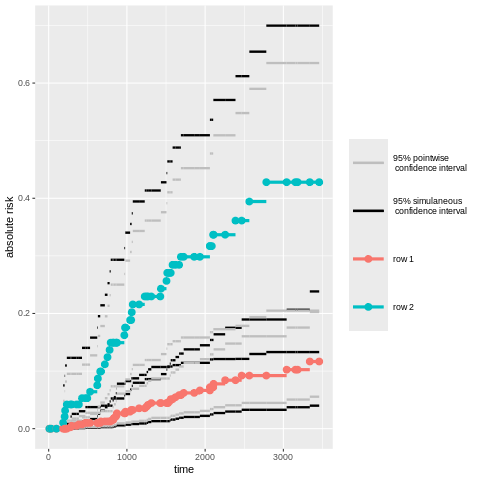

In [ ]:
%%R
figure3 <- autoplot(pfit1band, band = TRUE, ci = TRUE)$plot

## Summary and Conclusions


**Cause-Specific Hazard Regression** is a foundational tool in competing risks analysis that models the instantaneous risk of a specific event type, treating other events as censoring. It is ideal for understanding etiology or mechanisms but should be complemented with cumulative incidence functions (CIFs) for risk prediction. This tutorial demonstrated how to fit, interpret, and visualize cause-specific hazard models using the `riskRegression` package in R, providing a practical framework for analyzing competing risks data.  At the end of this tutorial, you should be able to:

- Understand the concept of cause-specific hazards in competing risks

- Fit cause-specific hazard models using `riskRegression::CSC()`

- Predict absolute risks (CIFs) from cause-specific hazard models




## Resources


1. Rosthøj, S., & Keiding, N. (2017). Competing risks: A simple re-parametrization of the cause-specific proportional hazards model. Research Report No. 62, Department of Mathematical Sciences, Aalborg University. https://vbn.aau.dk/ws/portalfiles/portal/271536290/RJ_2017_062.pdf  

2. Putter, H., Fiocco, M., & Geskus, R. B. (2007). Tutorial in biostatistics: Competing risks and multi-state models. *Statistics in Medicine*

3.  Andersen, P. K., & Keiding, N. (2012). Interpretability and importance of functionals in competing risks and multi-state models. *Statistics in Medicine*.